<a href="https://colab.research.google.com/github/Gerandi/LSTM-US30/blob/main/DAX40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1554]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
import os

In [1555]:
# Set a global seed value
SEED = 20

# Set seed for Python's built-in random module
random.seed(SEED)

# Set seed for NumPy
np.random.seed(SEED)

# Set seed for TensorFlow
tf.random.set_seed(SEED)

# Set seed for GPU operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)

# Set seed for Keras
tf.keras.utils.set_random_seed(SEED)

print("Random seeds have been set for reproducibility.")

Random seeds have been set for reproducibility.


In [1556]:
import yfinance as yf

# DAX 40 companies information
dax40_info = {
    'Adidas': {'sector': 'Apparel', 'ticker': 'ADS.DE'},
    'Airbus': {'sector': 'Aerospace & Defence', 'ticker': 'AIR.DE'},
    'Allianz': {'sector': 'Financial Services', 'ticker': 'ALV.DE'},
    'BASF': {'sector': 'Chemicals', 'ticker': 'BAS.DE'},
    'Bayer': {'sector': 'Pharmaceuticals', 'ticker': 'BAYN.DE'},
    'Beiersdorf': {'sector': 'Consumer goods', 'ticker': 'BEI.DE'},
    'BMW': {'sector': 'Automotive', 'ticker': 'BMW.DE'},
    'Brenntag': {'sector': 'Distribution', 'ticker': 'BNR.DE'},
    'Commerzbank': {'sector': 'Financial Services', 'ticker': 'CBK.DE'},
    'Continental': {'sector': 'Automotive', 'ticker': 'CON.DE'},
    'Covestro': {'sector': 'Chemicals', 'ticker': '1COV.DE'},
    'Daimler Truck': {'sector': 'Automotive', 'ticker': 'DTG.DE'},
    'Deutsche Bank': {'sector': 'Financial Services', 'ticker': 'DBK.DE'},
    'Deutsche Börse': {'sector': 'Financial Services', 'ticker': 'DB1.DE'},
    'Deutsche Post': {'sector': 'Logistics', 'ticker': 'DHL.DE'},
    'Deutsche Telekom': {'sector': 'Telecommunication', 'ticker': 'DTE.DE'},
    'E.ON': {'sector': 'Utilities', 'ticker': 'EOAN.DE'},
    'Fresenius': {'sector': 'Healthcare', 'ticker': 'FRE.DE'},
    'Hannover Re': {'sector': 'Insurance', 'ticker': 'HNR1.DE'},
    'Heidelberg Materials': {'sector': 'Construction Materials', 'ticker': 'HEI.DE'},
    'Henkel': {'sector': 'Consumer Goods', 'ticker': 'HEN3.DE'},
    'Infineon Technologies': {'sector': 'Technology', 'ticker': 'IFX.DE'},
    'Mercedes-Benz Group': {'sector': 'Automotive', 'ticker': 'MBG.DE'},
    'Merck': {'sector': 'Pharmaceuticals', 'ticker': 'MRK.DE'},
    'MTU Aero Engines': {'sector': 'Aerospace & Defence', 'ticker': 'MTX.DE'},
    'Munich Re': {'sector': 'Financial Services', 'ticker': 'MUV2.DE'},
    'Porsche': {'sector': 'Automotive', 'ticker': 'P911.DE'},
    'Porsche SE': {'sector': 'Automotive', 'ticker': 'PAH3.DE'},
    'Qiagen': {'sector': 'Biotech', 'ticker': 'QIA.DE'},
    'Rheinmetall': {'sector': 'Aerospace & Defence', 'ticker': 'RHM.DE'},
    'RWE': {'sector': 'Utilities', 'ticker': 'RWE.DE'},
    'SAP': {'sector': 'Technology', 'ticker': 'SAP.DE'},
    'Sartorius': {'sector': 'Medical Technology', 'ticker': 'SRT3.DE'},
    'Siemens': {'sector': 'Industrials', 'ticker': 'SIE.DE'},
    'Siemens Energy': {'sector': 'Energy technology', 'ticker': 'ENR.DE'},
    'Siemens Healthineers': {'sector': 'Medical Equipment', 'ticker': 'SHL.DE'},
    'Symrise': {'sector': 'Chemicals', 'ticker': 'SY1.DE'},
    'Volkswagen Group': {'sector': 'Automotive', 'ticker': 'VOW3.DE'},
    'Vonovia': {'sector': 'Real Estate', 'ticker': 'VNA.DE'},
    'Zalando': {'sector': 'E-Commerce', 'ticker': 'ZAL.DE'}
}

tickers = [stock['ticker'] for stock in dax40_info.values()]

In [1557]:
start_date = "2020-06-01"
end_date = "2024-06-01"

data = yf.download(tickers, start=start_date, end=end_date)
stocks_df = data['Close']

# Select a random ticker
rand_ticker = random.choice(tickers)


[*********************100%%**********************]  40 of 40 completed


In [1558]:
# Create a line plot using Plotly Express
fig = px.line(stocks_df, x=stocks_df.index, y=stocks_df.iloc[:, 0], title='Asset Value Chart', labels={'x': 'Date', 'y': rand_ticker})
fig.show()

Daily Returns

In [1559]:
returns_df = stocks_df.pct_change().dropna()
returns_df = returns_df.ffill()
returns_df.head()

Ticker,1COV.DE,ADS.DE,AIR.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,BNR.DE,CBK.DE,...,RHM.DE,RWE.DE,SAP.DE,SHL.DE,SIE.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,ZAL.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-03,0.032837,0.001009,0.003712,-0.001607,0.033838,0.011389,-0.025062,0.010573,0.016351,-0.006265,...,0.020860,0.019053,0.008203,0.014002,-0.002767,0.054046,-0.006471,0.023413,0.000316,0.008403
2022-10-04,0.048836,0.060504,0.061526,0.035038,0.033219,0.014388,0.024690,0.029973,0.037855,0.047971,...,-0.044582,0.030382,0.043627,0.034521,0.053508,0.076780,0.028056,0.000440,0.038754,0.082843
2022-10-05,-0.014687,-0.026941,-0.014253,-0.006459,-0.009102,0.000103,0.001487,-0.018943,-0.015502,-0.038451,...,-0.006481,0.010837,-0.014349,-0.019376,-0.019564,-0.034296,0.002437,-0.046614,-0.013096,-0.052512
2022-10-06,-0.006660,-0.007655,-0.002785,-0.007103,-0.015388,-0.019424,0.003465,0.006996,-0.013893,-0.000272,...,-0.015003,-0.025929,0.009858,-0.001317,0.008634,0.021972,-0.009723,-0.012454,0.021293,0.032011
2022-10-07,-0.018519,-0.051699,-0.008592,-0.003880,-0.013933,-0.005974,-0.002960,-0.003752,-0.029117,0.004082,...,0.023510,0.000512,-0.015550,-0.015388,-0.023588,-0.048250,-0.018164,-0.037366,-0.015863,-0.044907


In [1560]:
fig = px.imshow(returns_df.iloc[:,0:10].corr(), text_auto=True, aspect="auto", title='Correlation Heatmap')
fig.show()

In [1561]:
fig = px.line(returns_df, x=returns_df.index, y='SAP.DE', title='Daily profitability of <span style="color:#006BB8">SAP</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#006BB8'))
fig.show()

In [1562]:
fig = px.line(returns_df, x=returns_df.index, y='SIE.DE', title='Daily profitability of <span style="color:#009999">Siemens</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#009999'))
fig.show()

In [1563]:
fig = px.line(returns_df, x=returns_df.index, y='DTE.DE', title='Daily profitability of <span style="color:#E20074">Deutsche Telekom</span>', labels={'x': 'Date', 'y': 'Profitability'})
fig.update_traces(line=dict(color='#E20074'))
fig.show()

In [1564]:
n = len(returns_df)
# Split the data
train_data = returns_df[:int(0.7*len(returns_df))]
val_data = returns_df[int(0.7*len(returns_df)):int(0.9*len(returns_df))]
test_data = returns_df[int(0.9*len(returns_df)):]

In [1565]:
train_data.shape, val_data.shape, test_data.shape

((297, 40), (85, 40), (43, 40))

### Function for building data windows

In [1592]:
class WindowCreate:
    def __init__(self, size, train=train_data, val=val_data, test=test_data):
        self.size = size
        self.train = train
        self.val = val
        self.test = test
        self.labels_size = 1
        self.win_size = size + self.labels_size
        self.stock_index = {stock: i for i, stock in enumerate(train.columns)}

        self.data_sl = slice(0, size)
        self.in_indexes = np.arange(self.win_size)[self.data_sl]
        self.label_sl = slice(self.labels_size, None)
        self.label_indexes = np.arange(self.win_size)[self.label_sl]

    def set_win(self, data):
        in_data = data[:, self.data_sl, :]
        label = data[:, self.label_sl, :]
        in_data.set_shape([None, self.size, None])
        label.set_shape([None, self.size, None])
        return in_data, label

    def dataset(self, input):
        input_data = np.array(input)
        dataset = tf.keras.utils.timeseries_dataset_from_array(
            data=input_data,
            targets=None,
            sequence_length=self.win_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=8)
        dataset = dataset.map(self.set_win)
        return dataset

    def plot(self, model=None, ticker=tickers[0]):
        ticker_index = self.stock_index[ticker]
        for a in range(3):
            image = self.example[a]
            in_data, labels = image[0], image[1]
            plt.subplot(3, 1, a+1)
            if a==0:
                plt.ylabel(ticker+' [training set]')
            elif a==1:
                plt.ylabel(ticker+' [validation set]')
            elif a==2:
                plt.ylabel(ticker+' [test set]')
            plt.plot(self.in_indexes, in_data[0, :, ticker_index],
                    label='Input data', marker='.', color = 'darkmagenta', zorder=-10)

            plt.scatter(self.label_indexes, labels[0, :, ticker_index],
                        edgecolors='navy', label='Labels', c='slateblue', s=50)
            if model is not None:
                pred = model(in_data)
                plt.scatter(self.label_indexes, pred[0, :, ticker_index],
                            marker='X', edgecolors='darkred', label='Prediction',
                            c='crimson', s=50)

            if a == 0:
                plt.legend()
            plt.xticks(np.arange(0, self.size+1, step=1))
        plt.xlabel('Day')

    @property
    def train_ds(self):
        return self.dataset(self.train)

    @property
    def val_ds(self):
        return self.dataset(self.val)

    @property
    def test_ds(self):
        return self.dataset(self.test)

    @property
    def example(self):
        train = next(iter(self.train_ds))
        val = next(iter(self.val_ds))
        test = next(iter(self.test_ds))
        result = [[tf.reshape(train[0][-1], [1, self.size, len(self.stock_index)])]+[tf.reshape(train[1][-1], [1, self.size,len(self.stock_index)])]] \
                                                                      + [[tf.reshape(val[0][-1], [1, self.size, len(self.stock_index)])] \
                                                                      + [tf.reshape(val[1][-1], [1, self.size, len(self.stock_index)])]] \
                                                                      + [[test[0]]+[test[1]]]
        return result

In [1594]:
    @property
    def train_ds(self):
        return self.dataset(self.train)

    @property
    def val_ds(self):
        return self.dataset(self.val)

    @property
    def test_ds(self):
        return self.dataset(self.test)

    @property
    def example(self):
        train = next(iter(self.train_ds))
        val = next(iter(self.val_ds))
        test = next(iter(self.test_ds))
        result = [[tf.reshape(train[0][-1], [1, self.size, len(self.stock_index)])]+[tf.reshape(train[1][-1], [1, self.size,len(self.stock_index)])]] \
                                                                      + [[tf.reshape(val[0][-1], [1, self.size, len(self.stock_index)])] \
                                                                      + [tf.reshape(val[1][-1], [1, self.size, len(self.stock_index)])]] \
                                                                      + [[test[0]]+[test[1]]]
        return result

WindowCreate.train_ds = train_ds
WindowCreate.val_ds = val_ds
WindowCreate.test_ds = test_ds
WindowCreate.example = example

In [1595]:
window1 = WindowCreate(size=5)
window2 = WindowCreate(size=10)
window3 = WindowCreate(size=15)
window4 = WindowCreate(size=20)
print("WindowCreate instances created for sizes 5, 10, 15, and 20")

WindowCreate instances created for sizes 5, 10, 15, and 20


In [1596]:
def compile_and_fit(model, train_data, val_data):
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=10,
                                                mode='auto')
    history = model.fit(train_data, epochs=100,
                        validation_data=val_data,
                        callbacks=[callback])
    return history

In [1597]:
# Model 1 (5-day window)
model1 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history1 = compile_and_fit(model1, window1.train_ds, window1.val_ds)

perf_v = {}
perf = {}
perf_v['5 days'] = model1.evaluate(window1.val_ds)
perf['5 days'] = model1.evaluate(window1.test_ds, verbose=0)

Epoch 1/100
37/37 [==============================] - 3s 18ms/step - loss: 3.6646e-04 - mean_absolute_error: 0.0129 - val_loss: 2.6754e-04 - val_mean_absolute_error: 0.0111
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 3.5990e-04 - mean_absolute_error: 0.0128 - val_loss: 2.6555e-04 - val_mean_absolute_error: 0.0111
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 3.5673e-04 - mean_absolute_error: 0.0127 - val_loss: 2.6593e-04 - val_mean_absolute_error: 0.0111
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 3.5518e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6530e-04 - val_mean_absolute_error: 0.0110
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 3.5363e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6709e-04 - val_mean_absolute_error: 0.0111
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 3.5224e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6513e-04 - val_m

In [1598]:
# Model 2 (10-day window)
model2 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history2 = compile_and_fit(model2, window2.train_ds, window2.val_ds)

perf_v['10 days'] = model2.evaluate(window2.val_ds)
perf['10 days'] = model2.evaluate(window2.test_ds, verbose=0)

Epoch 1/100
36/36 [==============================] - 3s 21ms/step - loss: 3.6698e-04 - mean_absolute_error: 0.0129 - val_loss: 2.7450e-04 - val_mean_absolute_error: 0.0113
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 3.5847e-04 - mean_absolute_error: 0.0127 - val_loss: 2.6985e-04 - val_mean_absolute_error: 0.0111
Epoch 3/100
36/36 [==============================] - 0s 7ms/step - loss: 3.5505e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6957e-04 - val_mean_absolute_error: 0.0111
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 3.5236e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6915e-04 - val_mean_absolute_error: 0.0111
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 3.5064e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6906e-04 - val_mean_absolute_error: 0.0110
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 3.4923e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6862e-04 - val_m

In [1599]:
# Model 3 (15-day window)
model3 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history3 = compile_and_fit(model3, window3.train_ds, window3.val_ds)

perf_v['15 days'] = model3.evaluate(window3.val_ds)
perf['15 days'] = model3.evaluate(window3.test_ds, verbose=0)

Epoch 1/100
36/36 [==============================] - 6s 20ms/step - loss: 3.5706e-04 - mean_absolute_error: 0.0127 - val_loss: 2.7063e-04 - val_mean_absolute_error: 0.0112
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 3.5193e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6778e-04 - val_mean_absolute_error: 0.0111
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 3.4947e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6712e-04 - val_mean_absolute_error: 0.0111
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: 3.4775e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6545e-04 - val_mean_absolute_error: 0.0110
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 3.4619e-04 - mean_absolute_error: 0.0124 - val_loss: 2.6461e-04 - val_mean_absolute_error: 0.0110
Epoch 6/100
36/36 [==============================] - 0s 9ms/step - loss: 3.4524e-04 - mean_absolute_error: 0.0124 - val_loss: 2.6401e-04 - val_m

In [1600]:
# Model 4 (20-day window)
model4 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history4 = compile_and_fit(model4, window4.train_ds, window4.val_ds)

perf_v['20 days'] = model4.evaluate(window4.val_ds)
perf['20 days'] = model4.evaluate(window4.test_ds, verbose=0)

Epoch 1/100
35/35 [==============================] - 3s 19ms/step - loss: 3.5475e-04 - mean_absolute_error: 0.0127 - val_loss: 2.6452e-04 - val_mean_absolute_error: 0.0112
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 3.5004e-04 - mean_absolute_error: 0.0126 - val_loss: 2.6302e-04 - val_mean_absolute_error: 0.0111
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 3.4736e-04 - mean_absolute_error: 0.0125 - val_loss: 2.6182e-04 - val_mean_absolute_error: 0.0111
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 3.4515e-04 - mean_absolute_error: 0.0124 - val_loss: 2.6035e-04 - val_mean_absolute_error: 0.0110
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 3.4327e-04 - mean_absolute_error: 0.0124 - val_loss: 2.6094e-04 - val_mean_absolute_error: 0.0110
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 3.4188e-04 - mean_absolute_error: 0.0124 - val_loss: 2.6054e-04 - val_m

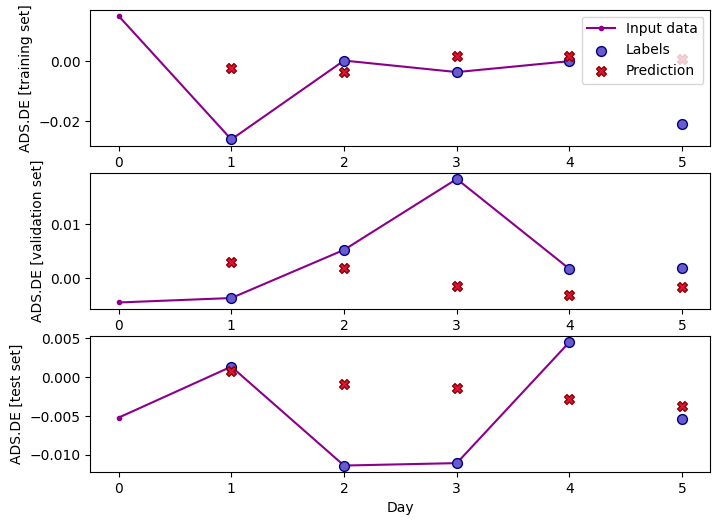

In [1601]:
window1.plot(model1)

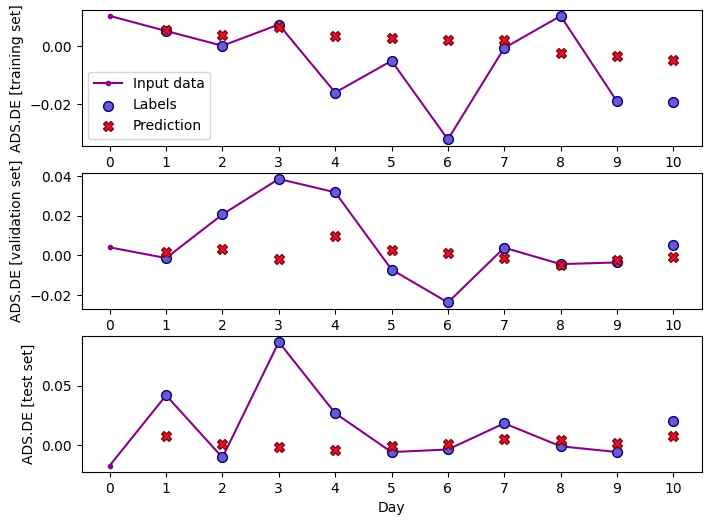

In [1602]:
window2.plot(model2)

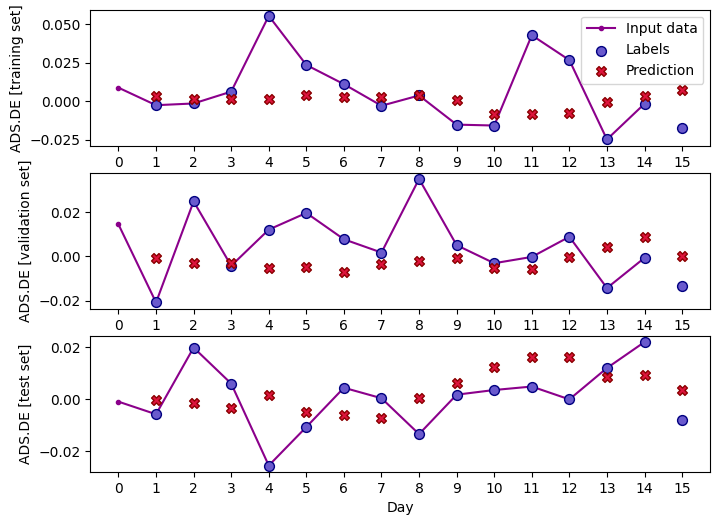

In [1603]:
window3.plot(model3)

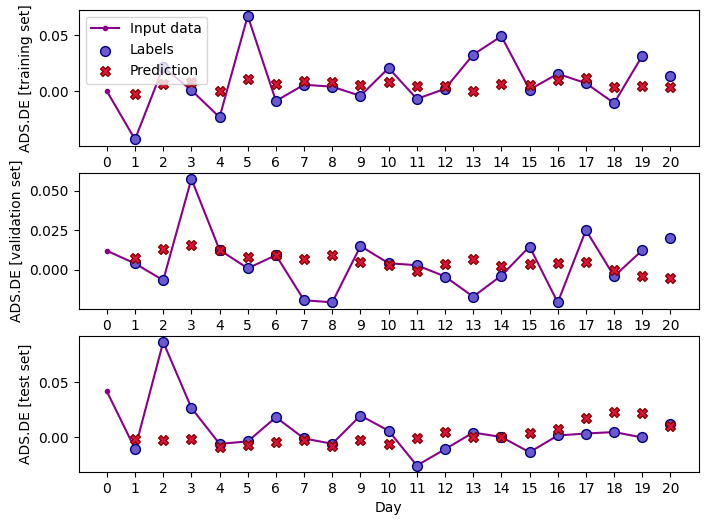

In [1604]:
window4.plot(model4)

In [1605]:
# Print performance metrics
print("Validation Performance:")
for key, value in perf_v.items():
    print(f"{key}: Loss = {value[0]:.4f}, MAE = {value[1]:.4f}")

print("\nTest Performance:")
for key, value in perf.items():
    print(f"{key}: Loss = {value[0]:.4f}, MAE = {value[1]:.4f}")

# Store predictions for later use
predictions = {
    5: model1.predict(window1.test_ds)[-1, -1, :],
    10: model2.predict(window2.test_ds)[-1, -1, :],
    15: model3.predict(window3.test_ds)[-1, -1, :],
    20: model4.predict(window4.test_ds)[-1, -1, :]
}

Validation Performance:
5 days: Loss = 0.0003, MAE = 0.0111
10 days: Loss = 0.0003, MAE = 0.0113
15 days: Loss = 0.0003, MAE = 0.0115
20 days: Loss = 0.0003, MAE = 0.0114

Test Performance:
5 days: Loss = 0.0003, MAE = 0.0121
10 days: Loss = 0.0003, MAE = 0.0123
15 days: Loss = 0.0003, MAE = 0.0126
20 days: Loss = 0.0003, MAE = 0.0124
3/3 [==============================] - 0s 4ms/step


In [1619]:
x = np.arange(len(perf))
width = 0.2

metric_name = 'mean_absolute_error'

# Extract MAE values
mae_valid = [value[1] for value in perf_v.values()]  # Index 1 corresponds to MAE
mae_test = [value[1] for value in perf.values()]  # Index 1 corresponds to MAE

# Plotting
fig = px.bar(x=list(perf.keys()) * 2, y=[value[1] for value in perf_v.values()] + [value[1] for value in perf.values()], color=['Validation'] * len(perf) + ['Test'] * len(perf), barmode='group', labels={'x': '', 'y': 'Mean Absolute Error (MAE)', 'color': 'Dataset'}, title='Model Performance Comparison', color_discrete_map={'Validation': 'purple', 'Test': 'orange'})
fig.update_layout(yaxis=dict(gridcolor='rgba(0,0,0,0.1)', griddash='dash'),font=dict(size=12),title_font_size=16)
fig.show()



In [1607]:
# # Recall our validation performance
# validation_performance = {
#     5: perf_v['5 days'][1],  # Using MAE as the performance metric
#     10: perf_v['10 days'][1],
#     15: perf_v['15 days'][1],
#     20: perf_v['20 days'][1]
# }

# # Find the best window size
# best_window_size = min(validation_performance, key=validation_performance.get)
# best_window_size

# # Select the best model (lowest MAE)
# best_window_size = min(validation_performance, key=validation_performance.get)

# print(f"Best performing model: {best_window_size}-day window")

# # Use the predictions from the best model
# R = predictions[best_window_size]

# print(f"Shape of R: {R.shape}")
# print(f"First few values of R: {R[:5]}")

Best performing model: 5-day window
Shape of R: (40,)
First few values of R: [ 0.002258 -0.002464  0.001611  0.002419  0.00033 ]


In [1620]:
models = {
    5: model1,
    10: model2,
    15: model3,
    20: model4
}

datasets = {
    5: window1.test_ds,
    10: window2.test_ds,
    15: window3.test_ds,
    20: window4.test_ds
}

# Recall our validation performance
validation_performance = {
    5: perf_v['5 days'][1],  # Using MAE as the performance metric
    10: perf_v['10 days'][1],
    15: perf_v['15 days'][1],
    20: perf_v['20 days'][1]
}

best_window_size = min(validation_performance, key=validation_performance.get)
print(f"Best performing model: {best_window_size}-day window")

# Select the best model and dataset based on the best window size
best_model = models[best_window_size]
best_dataset = datasets[best_window_size]
# Use the predictions from the best model
last_month_returns = next(iter(best_dataset))[-1]  # Fetching the last element of the best dataset
return_prediction = best_model(last_month_returns)[0][-1]
R = return_prediction.numpy()

Best performing model: 5-day window


In [1621]:
from tabulate import tabulate

num_features = returns_df.shape[1]
arg_sort = sorted(range(len(R)), key=lambda i: R[i])
returns_s = [R[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
returns_stocks_ = []
for i in range(num_features):
  returns_stocks_.append([stock_name[i], returns_s[i]])
print(tabulate(returns_stocks_))

-------  ------------
HNR1.DE  -0.00408173
QIA.DE   -0.00401306
BEI.DE   -0.00365829
RWE.DE   -0.00262451
ADS.DE   -0.00250244
ZAL.DE   -0.00152779
SY1.DE   -0.00111771
IFX.DE   -0.000999451
BAS.DE   -0.00058794
MRK.DE   -0.000526428
SRT3.DE   0.000247955
DB1.DE    0.000421524
CON.DE    0.000527382
EOAN.DE   0.000754356
1COV.DE   0.000779152
DTG.DE    0.00102711
DTE.DE    0.00108528
HEN3.DE   0.0011797
VNA.DE    0.00131035
MTX.DE    0.00139618
BNR.DE    0.00141144
MUV2.DE   0.00177765
SAP.DE    0.00198364
MBG.DE    0.00215721
PAH3.DE   0.0023613
HEI.DE    0.00252533
SHL.DE    0.0034771
ALV.DE    0.003582
VOW3.DE   0.00372314
SIE.DE    0.00515747
RHM.DE    0.00649643
DBK.DE    0.00662994
AIR.DE    0.0066452
CBK.DE    0.00694275
BAYN.DE   0.00700378
DHL.DE    0.00726318
FRE.DE    0.00801849
P911.DE   0.0103226
BMW.DE    0.0111847
ENR.DE    0.0114822
-------  ------------


Covariance matrix of asset returns

In [1622]:
# Covariance matrix of asset returns
V = np.cov(returns_df.T)
V_inv = np.linalg.inv(V)

# Column vector I, consisting of n ones (n = number of securities in the portfolio)
I = np.ones(stocks_df.shape[1])
I_T = I.T


In [1623]:
sigma = 0.03
alpha = I@V_inv@I_T
beta = I@V_inv@R
gamma = R.T@V_inv@R
delta = alpha*gamma - beta*beta
mu0 = beta/alpha + math.sqrt((sigma*sigma - 1/alpha)*delta/alpha)

# Final weights
W = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*R)

In [1624]:
from tabulate import tabulate
arg_sort = sorted(range(len(W)), key=lambda i: W[i])
weight = [W[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
weights_ = []
for i in range(num_features):
  weights_.append([stock_name[i], weight[i]])
print(tabulate(weights_))

-------  ----------
HNR1.DE  -1.34496
MBG.DE   -1.0005
BAS.DE   -0.666313
QIA.DE   -0.594963
BEI.DE   -0.590963
RWE.DE   -0.493275
HEI.DE   -0.46356
PAH3.DE  -0.457314
IFX.DE   -0.32312
MTX.DE   -0.291614
ADS.DE   -0.237407
CON.DE   -0.221161
DTG.DE   -0.151622
SAP.DE   -0.124996
1COV.DE  -0.0735965
BNR.DE   -0.054831
DTE.DE   -0.0384508
VOW3.DE  -0.0282
VNA.DE    0.0136895
DB1.DE    0.0241764
SRT3.DE   0.0255156
ZAL.DE    0.0407273
EOAN.DE   0.0498671
ENR.DE    0.0638641
SIE.DE    0.113717
CBK.DE    0.117475
DBK.DE    0.129115
MRK.DE    0.149261
SY1.DE    0.15829
BAYN.DE   0.185776
RHM.DE    0.188304
SHL.DE    0.305044
P911.DE   0.507545
FRE.DE    0.546303
ALV.DE    0.621307
DHL.DE    0.651671
HEN3.DE   0.72329
MUV2.DE   0.861447
AIR.DE    0.947115
BMW.DE    1.73335
-------  ----------


In [1625]:
portfolio_return = R@W
portfolio_return

0.05799965684845049

In [1626]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(10000):
    weights = np.random.random(num_features) * (1 + 1) - 1
    weights = weights/sum(weights)
    returns = weights@R
    vol = weights.T@V@weights
    if vol < 1:
      portfolio_returns.append(returns)
      portfolio_volatilities.append(vol)

Text(0.5, 1.0, 'Efficient Frontier')

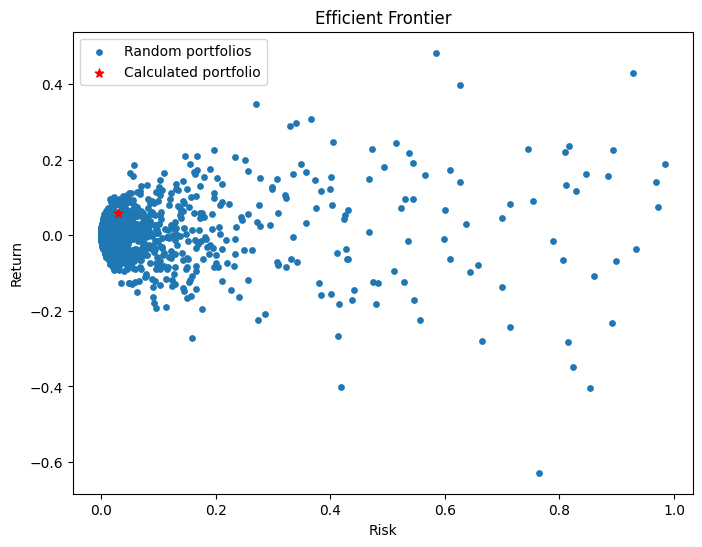

In [1627]:
plt.scatter(portfolio_volatilities, portfolio_returns, s=15, label='Random portfolios')
plt.scatter(sigma, portfolio_return, color='r', s=40, marker='*', label='Calculated portfolio')
plt.legend()
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')


In [1628]:
# Download DAX 40 index data
dax_index = yf.download('^GDAXI', start=start_date, end=end_date)['Close']

# Calculate DAX 40 index returns
dax_returns = dax_index.pct_change().dropna()

# Calculate cumulative returns for DAX 40 index
dax_cumulative_returns = (1 + dax_returns).cumprod() - 1

# Calculate cumulative returns for our optimized portfolio
optimized_returns = returns_df.dot(W)
optimized_cumulative_returns = (1 + optimized_returns).cumprod() - 1

# Plot cumulative returns comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=dax_cumulative_returns.index, y=dax_cumulative_returns, name='DAX 40', line=dict(color='#1C73BA')))
fig.add_trace(go.Scatter(x=optimized_cumulative_returns.index, y=optimized_cumulative_returns, name='LSTM Short', line=dict(color='#FF5733')))
fig.update_layout(title=('Cumulative Returns Comparison of ''<span style="color:#5A5B5B">DA</span>''<span style="color:#1C73BA">X</span>'' 40'' & <span style="color:#FF5733">LSTM</span>'' Short Selling Portfolio'),xaxis_title='Date',yaxis_title='Cumulative Returns',legend=dict(itemsizing='constant',font=dict(size=12)))
fig.show()

# Align Dax40 to LSTM_Short
aligned_dax_returns = dax_returns.loc[optimized_returns.index]

# Calculate performance metrics
def calculate_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility
    return total_return, annualized_return, volatility, sharpe_ratio

dax_metrics = calculate_metrics(aligned_dax_returns)
optimized_metrics = calculate_metrics(optimized_returns)

# Print comparison results
metrics = [
    ['Total Return', f'{dax_metrics[0]:.2%}', f'{optimized_metrics[0]:.2%}'],
    ['Annualized Return', f'{dax_metrics[1]:.2%}', f'{optimized_metrics[1]:.2%}'],
    ['Volatility', f'{dax_metrics[2]:.2%}', f'{optimized_metrics[2]:.2%}'],
    ['Sharpe Ratio', f'{dax_metrics[3]:.4f}', f'{optimized_metrics[3]:.4f}'],
]
headers = ['Metric', 'DAX 40', 'LSTM Short']
print("Performance Comparison aligned for LSTM Period")
print(tabulate(metrics, headers=headers, tablefmt='pretty', floatfmt=(".2%", ".2%", ".4f")))


[*********************100%%**********************]  1 of 1 completed


Performance Comparison aligned for LSTM Period
+-------------------+--------+------------+
|      Metric       | DAX 40 | LSTM Short |
+-------------------+--------+------------+
|   Total Return    | 52.69% |   99.36%   |
| Annualized Return | 28.53% |   50.55%   |
|    Volatility     | 13.13% |   47.62%   |
|   Sharpe Ratio    | 2.1727 |   1.0615   |
+-------------------+--------+------------+


The LSTM MVO Portfolio is using negative weights (short-selling). Lets force the portfolio to only go long.
The stocks with negative predictions are remove from the portfolio construction.
We compare again with DAX40

In [1629]:
# Covariance matrix and other calculations
V = np.cov(returns_df.T)
V_inv = np.linalg.inv(V)

# Column vector I, consisting of n ones (n = number of securities in the portfolio)
I = np.ones(stocks_df.shape[1])
I_T = I.T

sigma = 0.03
alpha = I@V_inv@I_T
beta = I@V_inv@R
gamma = R.T@V_inv@R
delta = alpha*gamma - beta*beta
mu0 = beta/alpha + math.sqrt((sigma*sigma - 1/alpha)*delta/alpha)

# Calculate initial weights
W_initial = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*R)

# Ensure non-negative weights
W_non_negative = np.maximum(W_initial, 0)

# Normalize weights to sum to 1
W = W_non_negative / np.sum(W_non_negative)

# Calculate portfolio return and risk
portfolio_return = R@W
portfolio_risk = math.sqrt(W.T@V@W)

print("Optimized Portfolio Weights:")
for ticker, weight in zip(tickers, W):
    print(f"{ticker}: {weight:.4f}")

print(f"\nOptimized Portfolio - Expected Return: {portfolio_return:.4f}, Risk: {portfolio_risk:.4f}")

Optimized Portfolio Weights:
ADS.DE: 0.0000
AIR.DE: 0.0000
ALV.DE: 0.1161
BAS.DE: 0.0762
BAYN.DE: 0.0000
BEI.DE: 0.0228
BMW.DE: 0.0000
BNR.DE: 0.2125
CBK.DE: 0.0000
CON.DE: 0.0144
1COV.DE: 0.0000
DTG.DE: 0.0030
DBK.DE: 0.0158
DB1.DE: 0.0799
DHL.DE: 0.0000
DTE.DE: 0.0000
EOAN.DE: 0.0078
FRE.DE: 0.0061
HNR1.DE: 0.0670
HEI.DE: 0.0000
HEN3.DE: 0.0887
IFX.DE: 0.0000
MBG.DE: 0.0000
MRK.DE: 0.0000
MTX.DE: 0.0183
MUV2.DE: 0.0000
P911.DE: 0.1056
PAH3.DE: 0.0622
QIA.DE: 0.0000
RHM.DE: 0.0000
RWE.DE: 0.0231
SAP.DE: 0.0000
SRT3.DE: 0.0000
SIE.DE: 0.0374
ENR.DE: 0.0139
SHL.DE: 0.0031
SY1.DE: 0.0194
VOW3.DE: 0.0017
VNA.DE: 0.0000
ZAL.DE: 0.0050

Optimized Portfolio - Expected Return: 0.0062, Risk: 0.0082


In [1630]:
# Calculate cumulative returns for our optimized portfolio
optimized_returns = returns_df.dot(W)
optimized_cumulative_returns = (1 + optimized_returns).cumprod() - 1

# Plot cumulative returns comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=dax_cumulative_returns.index, y=dax_cumulative_returns, name='DAX 40', line=dict(color='#1C73BA')))
fig.add_trace(go.Scatter(x=optimized_cumulative_returns.index, y=optimized_cumulative_returns, name='LSTM Long', line=dict(color='#50C878')))
fig.update_layout(title=('Cumulative Returns Comparison of ''<span style="color:#5A5B5B">DA</span>''<span style="color:#1C73BA">X</span>'' 40'' & <span style="color:#50C878">LSTM</span>'' Portfolio'),xaxis_title='Date',yaxis_title='Cumulative Returns',legend=dict(itemsizing='constant',font=dict(size=12)))
fig.show()

# Calculate performance metrics
def calculate_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility
    return total_return, annualized_return, volatility, sharpe_ratio

optimized_long_metrics = calculate_metrics(optimized_returns)

# Print comparison results
metrics = [
    ['Total Return', f'{dax_metrics[0]:.2%}', f'{optimized_long_metrics[0]:.2%}'],
    ['Annualized Return', f'{dax_metrics[1]:.2%}', f'{optimized_long_metrics[1]:.2%}'],
    ['Volatility', f'{dax_metrics[2]:.2%}', f'{optimized_long_metrics[2]:.2%}'],
    ['Sharpe Ratio', f'{dax_metrics[3]:.4f}', f'{optimized_long_metrics[3]:.4f}'],
]
headers = ['Metric', 'DAX 40', 'LSTM Long']
print("Performance Comparison aligned for LSTM Period")
print(tabulate(metrics, headers=headers, tablefmt='pretty', floatfmt=(".2%", ".2%", ".4f")))

Performance Comparison aligned for LSTM Period
+-------------------+--------+-----------+
|      Metric       | DAX 40 | LSTM Long |
+-------------------+--------+-----------+
|   Total Return    | 52.69% |  47.12%   |
| Annualized Return | 28.53% |  25.72%   |
|    Volatility     | 13.13% |  13.03%   |
|   Sharpe Ratio    | 2.1727 |  1.9741   |
+-------------------+--------+-----------+
